# XGBoost using sklearn

Here we pilot a simple pipeline with some preprocessing of predictors and a XGBoost model without hyperparameter tuning. Some good next steps would be to add more predictors, test different models, tuning, ensemble, scale the SalePrice column...

Maybe use the jupytext package to have them synced continuously?

In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

In [2]:
df_train = pd.read_csv("data/train.csv")

In [3]:
cols_to_keep = ["ExterQual", "LotArea", "YrSold", "SalePrice"]
pred_cols = [x for x in cols_to_keep if x != "SalePrice"]

In [4]:
df = df_train[cols_to_keep]

In [5]:
y = df["SalePrice"]
X = df.drop(["SalePrice"], axis = 1)

# Split data into train and test

In [6]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define which columns should be one-hot encoded and which should be scaled
categorical_cols = ['YrSold', 'ExterQual']
numeric_cols = ['LotArea']

# Preprocessing steps for different column types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_cols),  # MinMaxScaler for numeric columns
        ('cat', OneHotEncoder(), categorical_cols)  # OneHotEncoder for categorical columns
    ])

# Create the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('model', GradientBoostingRegressor())  # XGBoost model
])

# Fit the pipeline (including preprocessing and model) on the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test set
score = pipeline.score(X_test, y_test)
print("Pipeline score:", score)

Pipeline score: 0.6341269677524048


# Predict on test set

In [7]:
df_test = pd.read_csv("data/test.csv")

In [8]:
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
test_filter = df_test[pred_cols]

In [10]:
print(test_filter)

     ExterQual  LotArea  YrSold
0           TA    11622    2010
1           TA    14267    2010
2           TA    13830    2010
3           TA     9978    2010
4           Gd     5005    2010
...        ...      ...     ...
1454        TA     1936    2006
1455        TA     1894    2006
1456        TA    20000    2006
1457        TA    10441    2006
1458        TA     9627    2006

[1459 rows x 3 columns]


In [11]:
yhat_test = pipeline.predict(test_filter)

In [12]:
df_test["SalePrice"] = yhat_test

In [13]:
test_export = df_test[["Id", "SalePrice"]]

In [14]:
test_export.to_csv("data/first_prediction.csv", index=False)

# Make some plots

In [24]:
train_preds = pipeline.predict(X_train)

In [25]:
df_plot = pd.DataFrame({'yhat': train_preds, 'y': y_train})

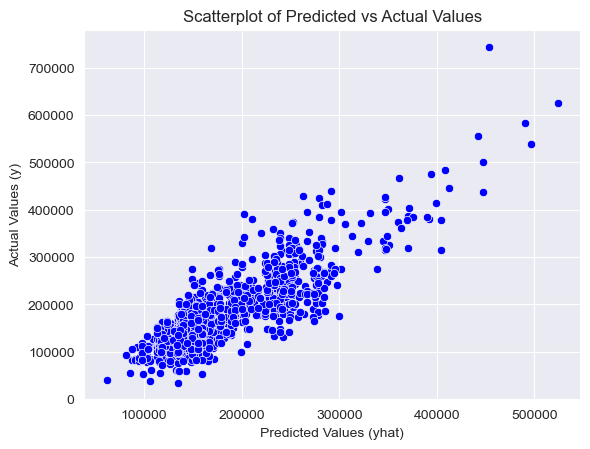

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot
sns.scatterplot(x='yhat', y='y', data=df_plot, color='blue')

# Add labels and title
plt.xlabel('Predicted Values (yhat)')
plt.ylabel('Actual Values (y)')
plt.title('Scatterplot of Predicted vs Actual Values')

# Show the plot
plt.show()

In [41]:
# Calculate residuals
df_plot["residuals"] = df_plot["y"] - df_plot["yhat"]

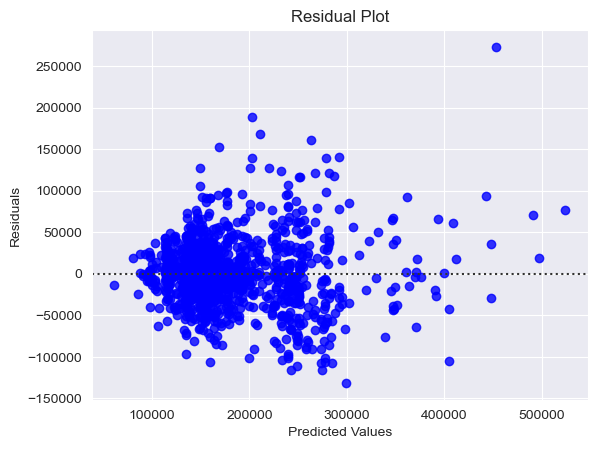

In [42]:
# Plot residuals
# Create a residual plot using sns.residplot()
sns.residplot(x=df_plot["yhat"], y=df_plot["residuals"], color='blue')

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Show the plot
plt.show()